In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
map_ = np.ones((5000,5000))

def add_obstacle(x, y, a, b):
    global map_
    x, y, a, b = map(int, [2500 + x*1000, 2500 - y*1000, a*500, b*500])
    map_[y-b:y+b,x-a:x+a] = 0


    
add_obstacle(0,-1,0.01,0.5)
add_obstacle(-0.5,-0.75,1,0.01)
add_obstacle(0.5,-0.75,1,0.01)
add_obstacle(-1.5,-0.75,1,0.01)
add_obstacle(-2,0.5,0.01,2.5)
add_obstacle(0,-2,0.01,1)
add_obstacle(0,1.5,0.01,2)
add_obstacle(1,-1,0.01,0.5)
add_obstacle(0,0.5,3,0.01)
add_obstacle(1.5,1.5,0.5,0.5)

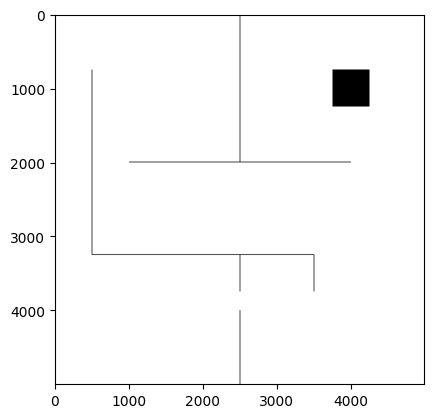

In [3]:
plt.imshow(map_,"gray")

In [4]:
def is_obst(x, y):
    x, y= map(int, [ 2500 - y*1000, 2500 + x*1000])
    return x < 0 or x >= map_.shape[0] or y < 0 or y >= map_.shape[1] or map_[x,y] == 0

In [11]:
N = 3
def modelate_lidar(x, y, angle, ran):
    ang = np.linspace(angle + 120/180*np.pi,angle - 120/180*np.pi,N)
    output = np.zeros_like(ang)
    ang[ang<-np.pi] += 2*np.pi
    ang[ang>-np.pi] -= 2*np.pi
    for i, a in enumerate(ang):
        x2, y2 = x + ran*np.cos(a), y + ran*np.sin(a)
        steps= 10**4
        for step in range(steps):
            x_s = x + step*(x2-x)/steps
            y_s = y + step*(y2-y)/steps
            if is_obst(x_s,y_s):
                output[i] = np.sqrt((x_s-x)**2 + (y_s-y)**2)
                break
        else:
            output[i] = np.inf
    return output

In [12]:
modelate_lidar(-1.5,-1.5,0,3)

array([0.8604, 1.4952, 1.155 ])

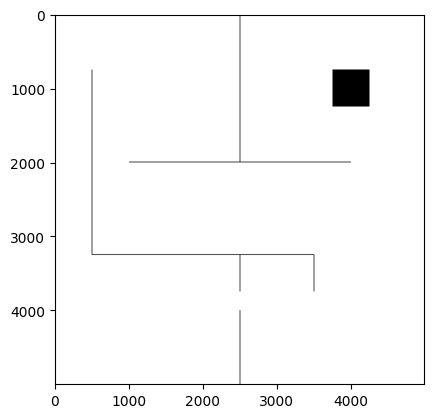

In [7]:
plt.imshow(map_,"gray")